In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize']=(15,3)

In [2]:
# import dataset
df = pd.read_csv("SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
# print shape of data
df.shape

(9994, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
## check the statistics of the numeric columns
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
## check for missing values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

There is no missing values in the dataset

In [7]:
## check unique categories in the dataset
print(df['Category'].unique())

['Furniture' 'Office Supplies' 'Technology']


In [8]:
## view the states in the dataset
print(df['State'].unique())

['Kentucky' 'California' 'Florida' 'North Carolina' 'Washington' 'Texas'
 'Wisconsin' 'Utah' 'Nebraska' 'Pennsylvania' 'Illinois' 'Minnesota'
 'Michigan' 'Delaware' 'Indiana' 'New York' 'Arizona' 'Virginia'
 'Tennessee' 'Alabama' 'South Carolina' 'Oregon' 'Colorado' 'Iowa' 'Ohio'
 'Missouri' 'Oklahoma' 'New Mexico' 'Louisiana' 'Connecticut' 'New Jersey'
 'Massachusetts' 'Georgia' 'Nevada' 'Rhode Island' 'Mississippi'
 'Arkansas' 'Montana' 'New Hampshire' 'Maryland' 'District of Columbia'
 'Kansas' 'Vermont' 'Maine' 'South Dakota' 'Idaho' 'North Dakota'
 'Wyoming' 'West Virginia']


In [9]:
number_of_states=df['State'].nunique()
print("There are %d states in this dataframe."%number_of_states)

There are 49 states in this dataframe.


In [10]:
## view the unique sub-category
print(df['Sub-Category'].unique())

['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [11]:
no_of_subcategory=df['Sub-Category'].nunique()
print("Categories are divided into %d subcategories"%no_of_subcategory)

Categories are divided into 17 subcategories


In [12]:
df['Segment'].value_counts()


Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [13]:
## Create a loss dataframe
loss_df=df[df['Profit'] < 0]
loss_df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
14,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580
15,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160
23,Second Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Chairs,71.3720,2,0.30,-1.0196
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522


In [14]:
loss_df.shape

(1871, 13)

In [15]:
loss_df.describe()


,Postal Code,Sales,Quantity,Discount,Profit
count,1871.000000,1871.000000,1871.000000,1871.000000,1871.000000
mean,55991.122929,250.511574,3.762694,0.480887,-83.448042
std,26041.501999,715.067296,2.141347,0.235080,284.423422
min,1841.000000,0.444000,1.000000,0.100000,-6599.978000
25%,33024.000000,12.503000,2.000000,0.200000,-58.660950
50%,60623.000000,71.088000,3.000000,0.400000,-18.088200
75%,77095.000000,284.922000,5.000000,0.700000,-6.261500
max,98198.000000,22638.480000,14.000000,0.800000,-0.089500


In [16]:
Total_loss=np.negative(loss_df['Profit'].sum())
print("Total loss = %.2f" %Total_loss)

Total loss = 156131.29


In [17]:
loss_df.groupby(by='Segment').sum()

,Postal Code,Sales,Quantity,Discount,Profit
Segment,,,,,
Consumer,57202260,247196.2460,3651,476.76,-84945.7112
Corporate,30034273,131860.5383,2191,272.00,-44787.2076
Home Office,17522858,89650.3705,1198,150.98,-26398.3669


In [18]:
loss_df.groupby(by='Sub-Category').sum()

,Postal Code,Sales,Quantity,Discount,Profit
Sub-Category,,,,,
Accessories,5286382,10958.8000,330,18.20,-930.6265
Appliances,4825871,3382.5340,235,53.60,-8629.6412
Binders,32609300,36140.6130,2456,452.40,-38510.4964
Bookcases,6423506,48072.7408,422,37.99,-12152.2060
Chairs,15008025,91988.4560,876,61.40,-9880.8413
Fasteners,701930,149.2800,55,2.40,-33.1952
Furnishings,10970913,12845.8440,597,88.60,-6490.9134
Machines,2236261,72456.2530,157,25.60,-30118.6682
Phones,6105294,35797.8400,476,46.60,-7530.6235


We can observe more loss in the Binders category, machines category, and tables category when compared to other categories.
Binders are more getting sold. So even giving less discount may lead to vast loss.
So better to give discounts on which are getting less sold so that even they will start getting sold more.

In [19]:
loss_df['Sub-Category'].value_counts()


Binders        613
Chairs         235
Tables         203
Furnishings    167
Storage        161
Phones         136
Bookcases      109
Accessories     91
Appliances      67
Machines        44
Supplies        33
Fasteners       12
Name: Sub-Category, dtype: int64

In [21]:
## Top 10 cities where loss is higher
loss_df.groupby(by='City').sum().sort_values('Profit',ascending=True).head(20)


,Postal Code,Sales,Quantity,Discount,Profit
City,,,,,
Philadelphia,4783713,70460.5510,892,115.30,-19590.7411
Houston,14256474,37640.7304,683,104.14,-14785.3668
Chicago,9397492,19910.0120,541,88.20,-11120.6271
San Antonio,2580831,17395.1450,139,17.10,-7831.0254
Lancaster,683904,7699.2420,71,9.40,-7632.4946
Burlington,108868,12044.8740,19,2.00,-5999.3318
Dallas,5487794,9994.0562,280,39.30,-4208.5218
Jacksonville,1237176,31146.2710,154,18.85,-4059.9857
New York City,400828,19533.8020,132,12.20,-3966.0226


In [22]:
loss_df.sort_values(['Sales'],ascending=True).groupby(by='Category').mean()

,Postal Code,Sales,Quantity,Discount,Profit
Category,,,,,
Furniture,59700.907563,361.184295,3.714286,0.367143,-85.344690
Office Supplies,54746.056433,103.395796,3.865688,0.617607,-63.899840
Technology,50287.590406,439.899974,3.553506,0.333579,-142.361322


While calculating an average, we observed that more loss is in the technology category

In [23]:
## last 10 states where sales are very less.
df.groupby(['State']).sum()['Sales'].nsmallest(10)


State
North Dakota             919.910
West Virginia           1209.824
Maine                   1270.530
South Dakota            1315.560
Wyoming                 1603.136
District of Columbia    2865.020
Kansas                  2914.310
Idaho                   4382.486
Iowa                    4579.760
New Mexico              4783.522
Name: Sales, dtype: float64

In [25]:

df.sort_values(['Segment'],ascending=True).groupby('Segment').sum()


,Postal Code,Sales,Quantity,Discount,Profit
Segment,,,,,
Consumer,288878609,1.161401e+06,19521,820.91,134119.2092
Corporate,164536330,7.061464e+05,11608,477.85,91979.1340
Home Office,98157713,4.296531e+05,6744,262.33,60298.6785


Here Consumer segment sales might be less when compared to other segments, but this is the only segment that provides the highest profits. So, if we increase sales in this Segment by advertisements or something else then, for sure, we can gain more profits.

In [26]:
df.groupby(by='Region').sum()


,Postal Code,Sales,Quantity,Discount,Profit
Region,,,,,
Central,151786150,501239.8908,8780,558.34,39706.3625
East,50171698,678781.2400,10618,414.00,91522.7800
South,55875052,391721.9050,6209,238.55,46749.4303
West,293739752,725457.8245,12266,350.20,108418.4489


sales are less in the South Region. So, to get better profits or more sales we should focus on this area

## Visualizations


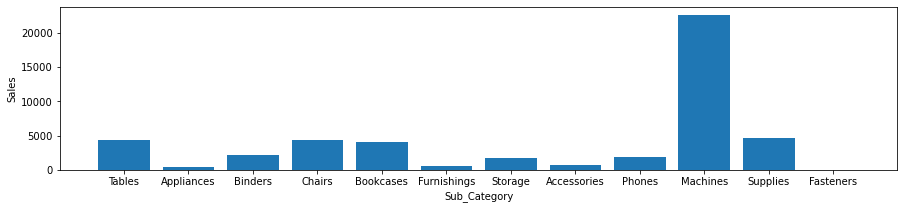

In [27]:
plt.bar(loss_df['Sub-Category'],loss_df['Sales']);
plt.rcParams.update({'font.size':10});
plt.xlabel('Sub_Category');
plt.ylabel('Sales');

 we observed that the Sales for Fasteners, Appliances, Furnishings, and Accessories is very low

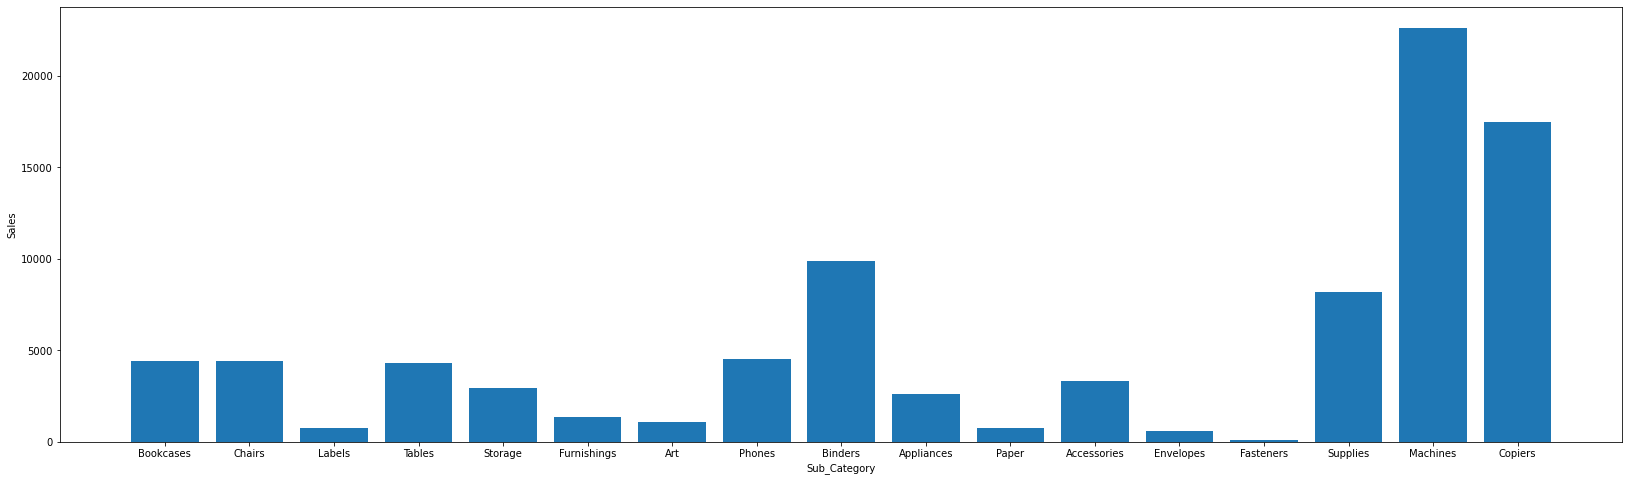

In [28]:
plt.rcParams['figure.figsize']=(28,8)
plt.bar(df['Sub-Category'],df['Sales']);
plt.rcParams.update({'font.size':18});
plt.xlabel('Sub_Category');
plt.ylabel('Sales');

Fasteners, Labels, Furnishings, Art, paper, Envelopes, etc., sub-categories have very fewer sales, that’s why it needs to be improved.

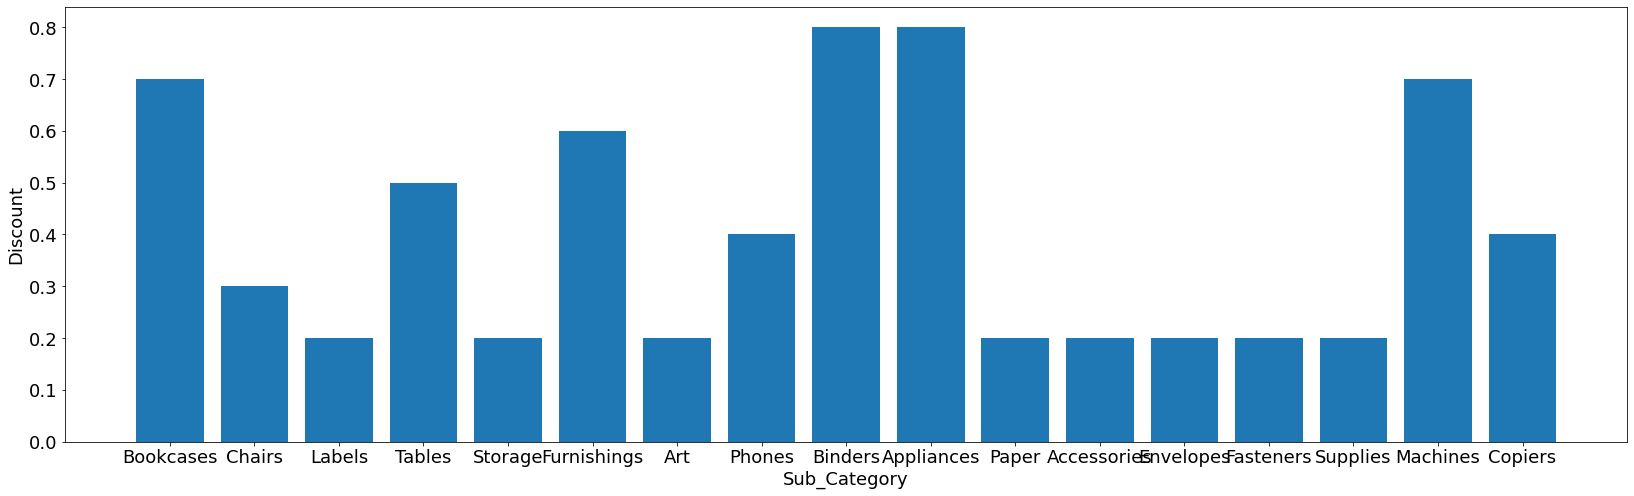

In [29]:
plt.rcParams['figure.figsize']=(28,8)
plt.bar(df['Sub-Category'],df['Discount']);
plt.rcParams.update({'font.size':18});
plt.xlabel('Sub_Category');
plt.ylabel('Discount');

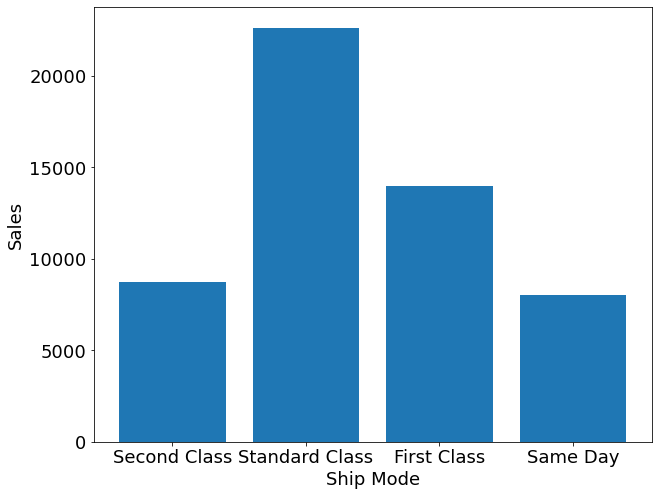

In [30]:
plt.rcParams['figure.figsize']=(10,8)
plt.bar(df['Ship Mode'],df['Sales']);
plt.rcParams.update({'font.size':14});
plt.xlabel('Ship Mode');
plt.ylabel('Sales');

Here we observe that the sales are high if the ship mode is standard class, and sales are low if the ship mode is either second class or same day.

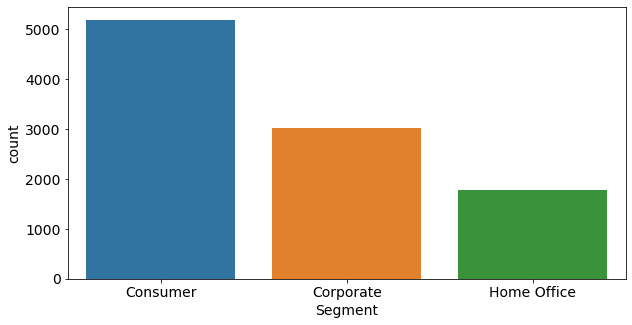

In [31]:
## Visualize count of segment
plt.rcParams['figure.figsize']=(10,5)
sns.countplot(x=df.Segment)
plt.show();

In the Home Office Segment, we observe that the count is less. So convergent strategy and improvement is a necessity for this Segment.

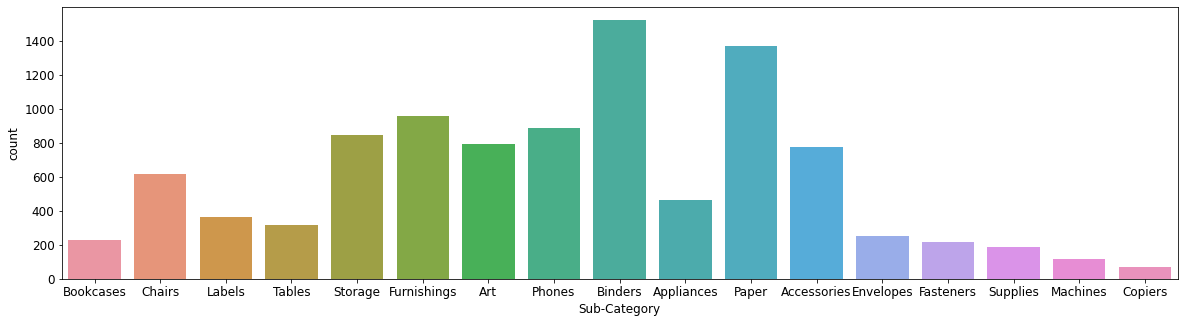

In [32]:
## count of subcategory
plt.rcParams['figure.figsize']=(20,5)
plt.rcParams.update({'font.size':12})
sns.countplot(x='Sub-Category',data=df)
plt.show()

 it’s very much clear that the Copiers and Machines Subcategory needs improvement.

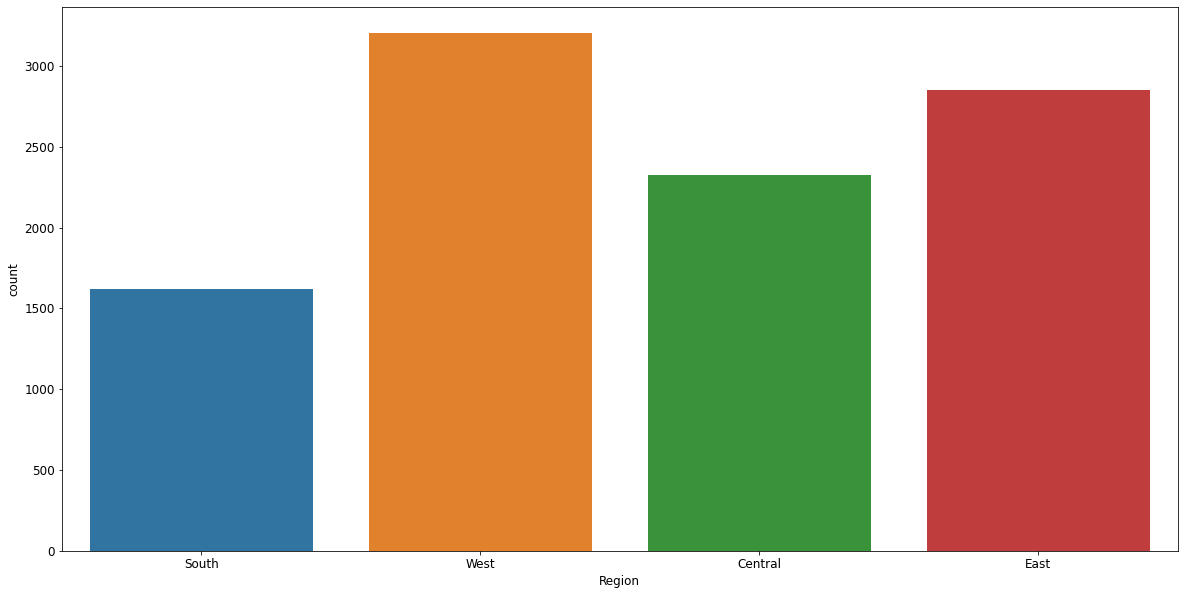

In [33]:
## count of region
plt.rcParams['figure.figsize']=(20,10)
plt.rcParams.update({'font.size':12})
sns.countplot(x='Region',data=df)
plt.show()

we can conclude that the south region needs more improvement compared to others.

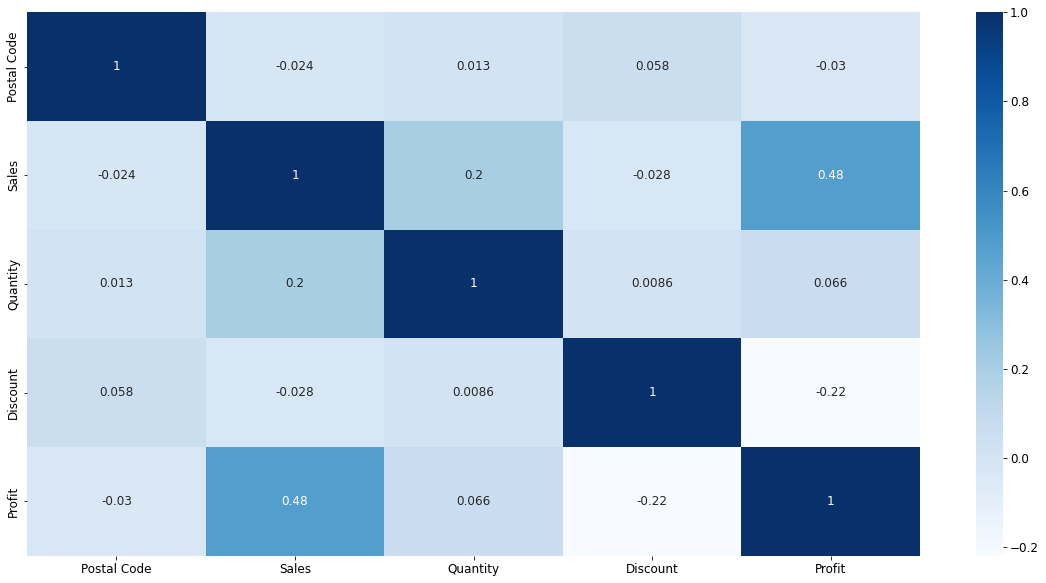

In [34]:
## Correlation Matrix
corr = df.corr()
sns.heatmap(corr,cmap='Blues',annot=True);

From the heatmap, Discount and Profit are Negatively Correlated. Sales and Profit are Moderately Correlated

## General Business Analysis

- In the Home Office Segment, we observe that the count is less. So convergent strategy and improvement is a necessity for this Segment.
- There is inappropriate discounting technique. Some areas lead to loss due to more discounts, and some areas lead to fewer sales due to fewer discounts